In [1]:
import os
import h5py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [5]:
f = h5py.File('/Volumes/Expansion3/User_backup2/b08209033/112-1 Chaos and Predictablity/HW2/Ra_1e1.h5', 'r')
b = f['tasks']['buoyancy']
vor = f['tasks']['vorticity']
print(vor.shape)

plt.figure(figsize = (16,9),
           dpi = 120)
plt.contourf(np.transpose(b[-1,:,:]), levels = 50, cmap='bwr', extend='both')
plt.contour(np.transpose(vor[-1,:,:]), levels = 10, colors = 'k')
plt.savefig("Image.png")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '~/home/b08209033/Mirror/b08209033/112-1 Chaos and Predictablity/HW2/Ra_1e1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [13]:
# def fourier(signal, num_of_waves = None):
#     N = len(signal)
#     signal = signal.reshape(-1, 1)
    
#     if num_of_waves == None:
#         num_of_waves = N
#     else:
#         pass
    
#     wavenumber = np.arange(-num_of_waves/2, num_of_waves/2, dtype = np.int64).reshape(-1, 1)
#     x = (np.arange(N)/N).reshape(1, -1)
#     temp = (2*np.pi) * wavenumber@x
    
#     DCT = np.cos(temp)
#     DST = np.sin(temp)
    
#     cos_coef = (DCT@signal)/N
#     sin_coef = (DST@signal)/N
    
#     print(DCT.shape)
#     print(cos_coef.shape)
#     reconstruct = DCT.T@cos_coef + DST.T@sin_coef
#     return cos_coef, sin_coef, reconstruct
def fourier(signal, num_of_waves = None, return_flag = False):
    N = len(signal)
    signal = signal.reshape(-1, 1)
    
    if num_of_waves == None:
        num_of_waves = N
    else:
        pass
    
    wavenumber = np.arange(-num_of_waves/2, num_of_waves/2, dtype = np.int64).reshape(-1, 1)
    x = (np.arange(N)/N).reshape(1, -1)
    temp = (2*np.pi) * wavenumber@x
    
    DCT = np.cos(temp)
    DST = np.sin(temp)
    
    cos_coef = (DCT@signal)/N
    sin_coef = (DST@signal)/N
    
    if return_flag:
        reconstruct = DCT.T@cos_coef + DST.T@sin_coef
        return cos_coef, sin_coef, reconstruct
    else:
        return cos_coef, sin_coef

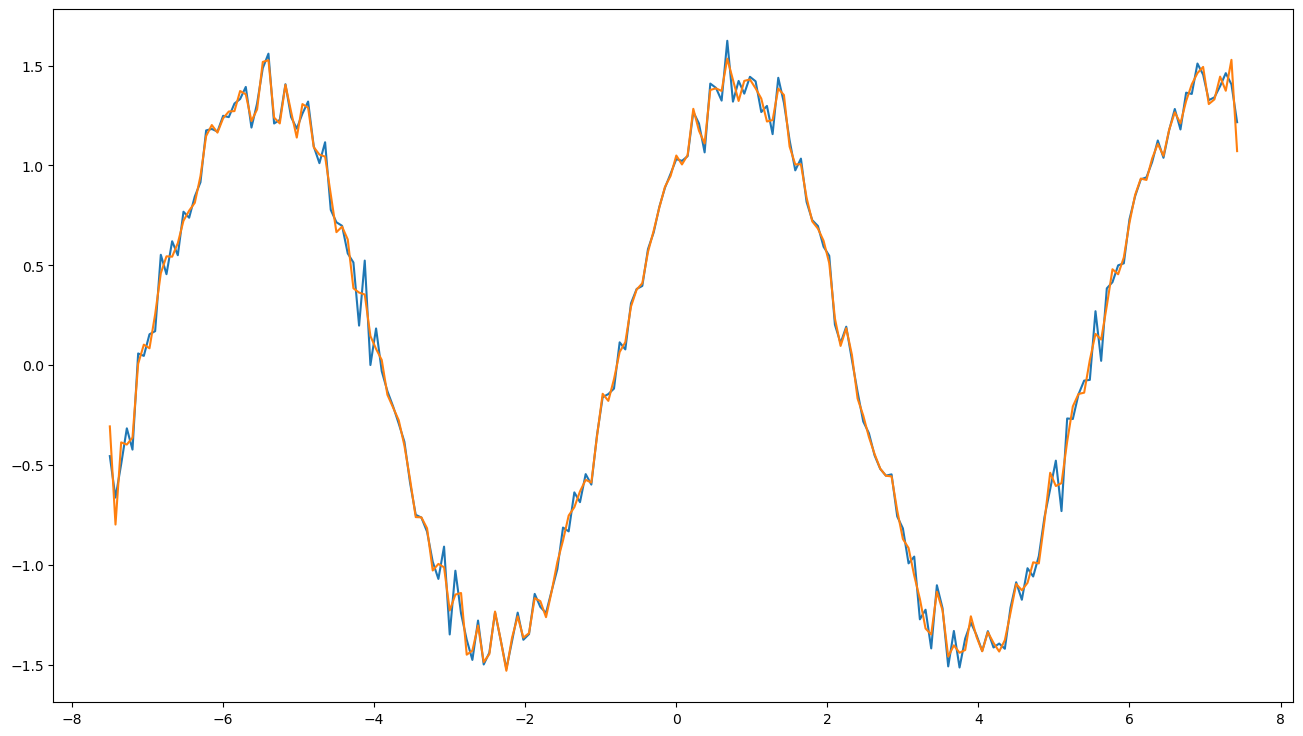

In [14]:
N = 200
L = 15
x = np.linspace(-L/2, L/2, N, endpoint = False)
y = np.random.normal(0, 1e-1, size=N) + np.cos(x) + np.sin(x)
A_k, B_k, ret = fourier(y, 150, True)

plt.figure(figsize = (16,9), dpi = 100)
plt.plot(x, y)
plt.plot(x, ret)

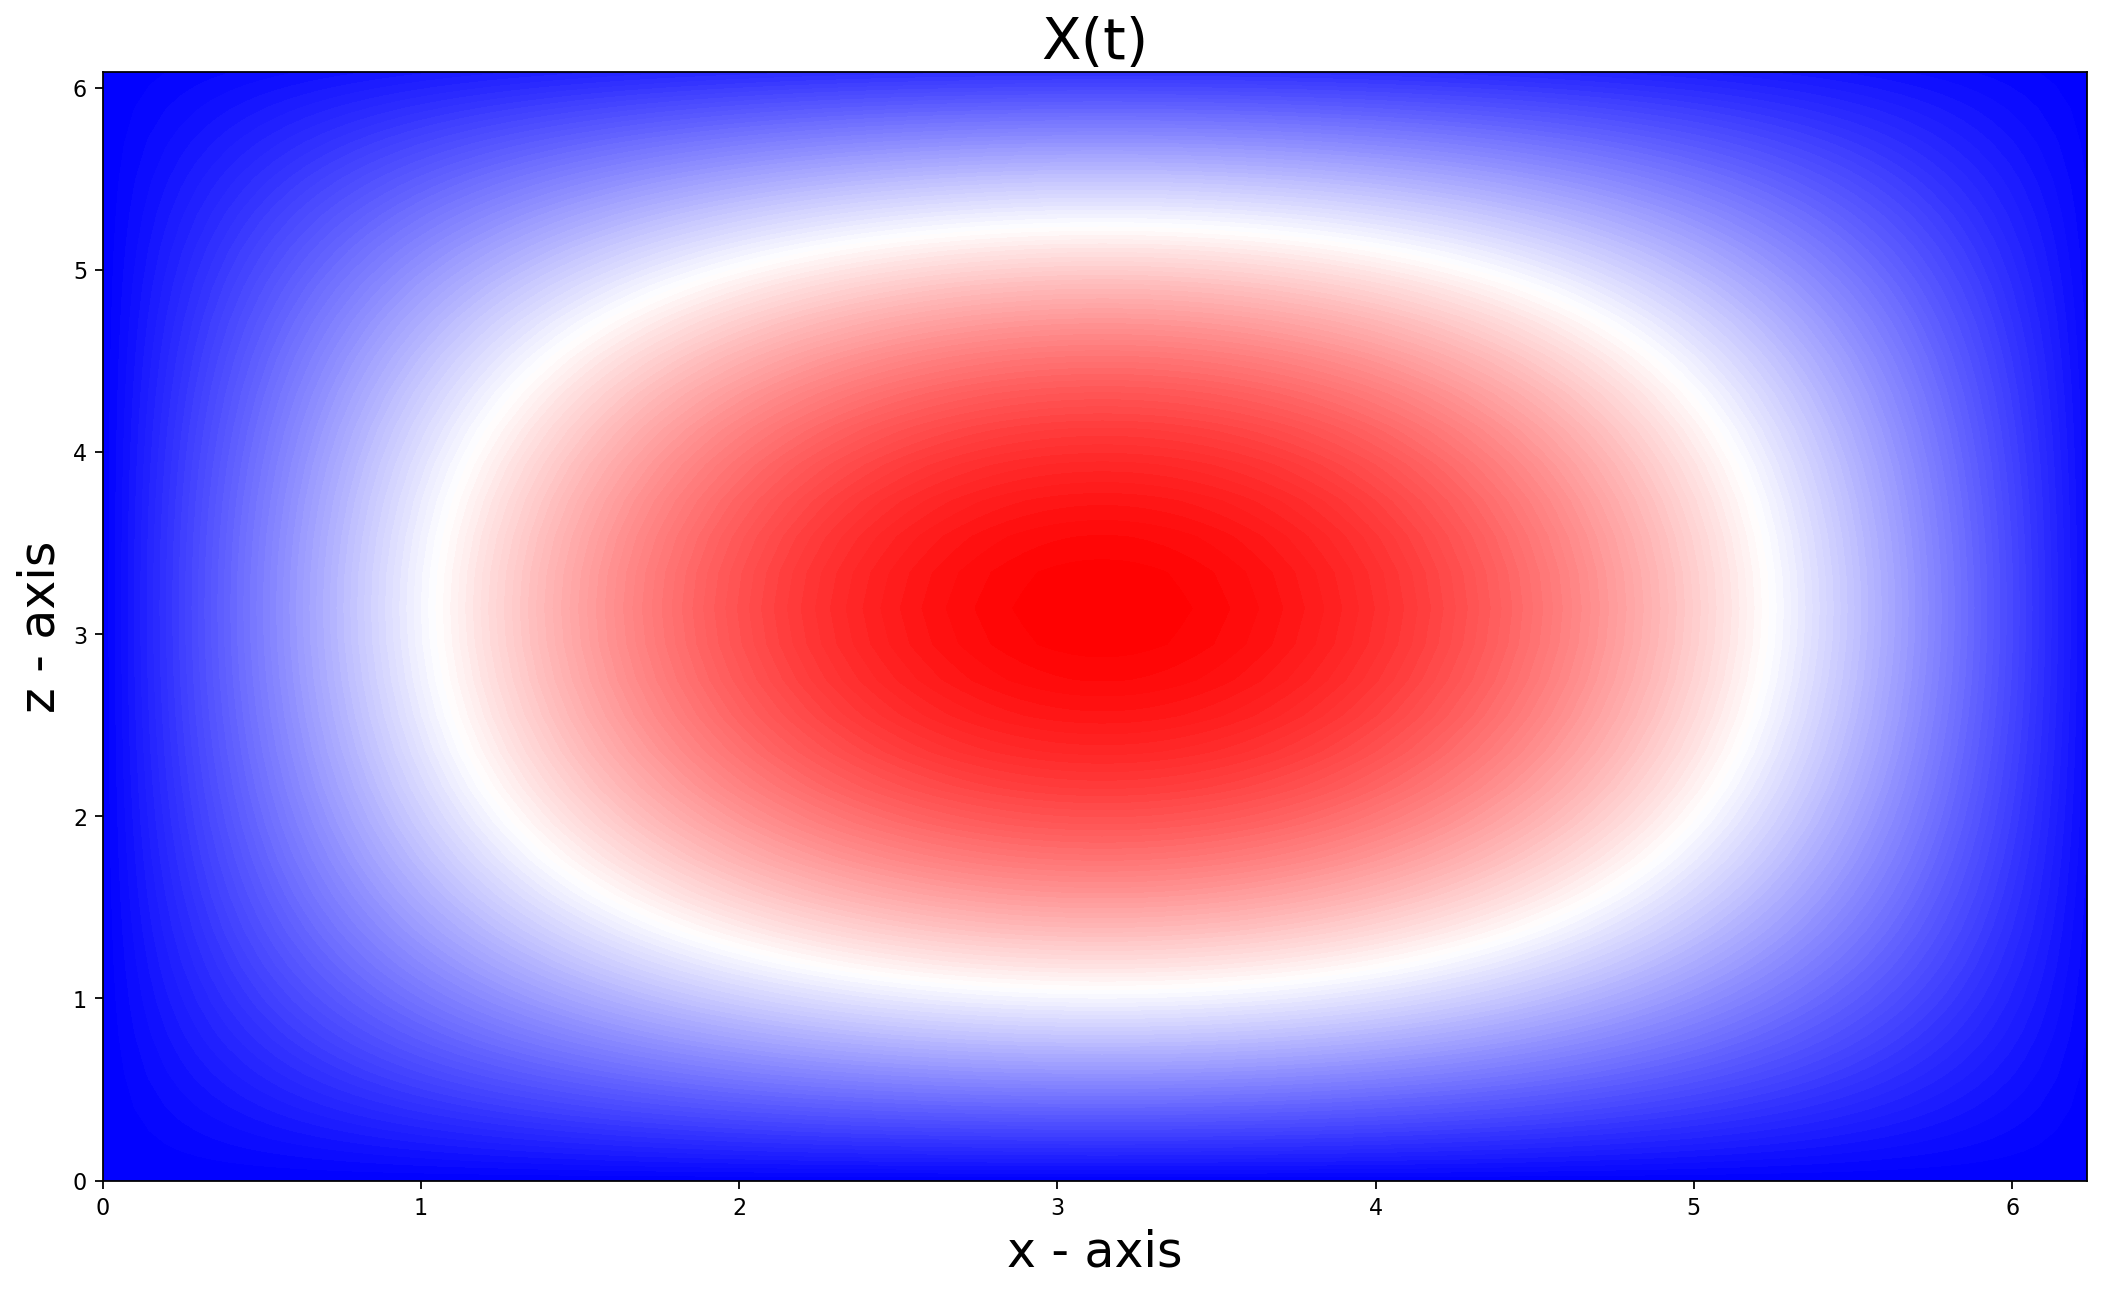

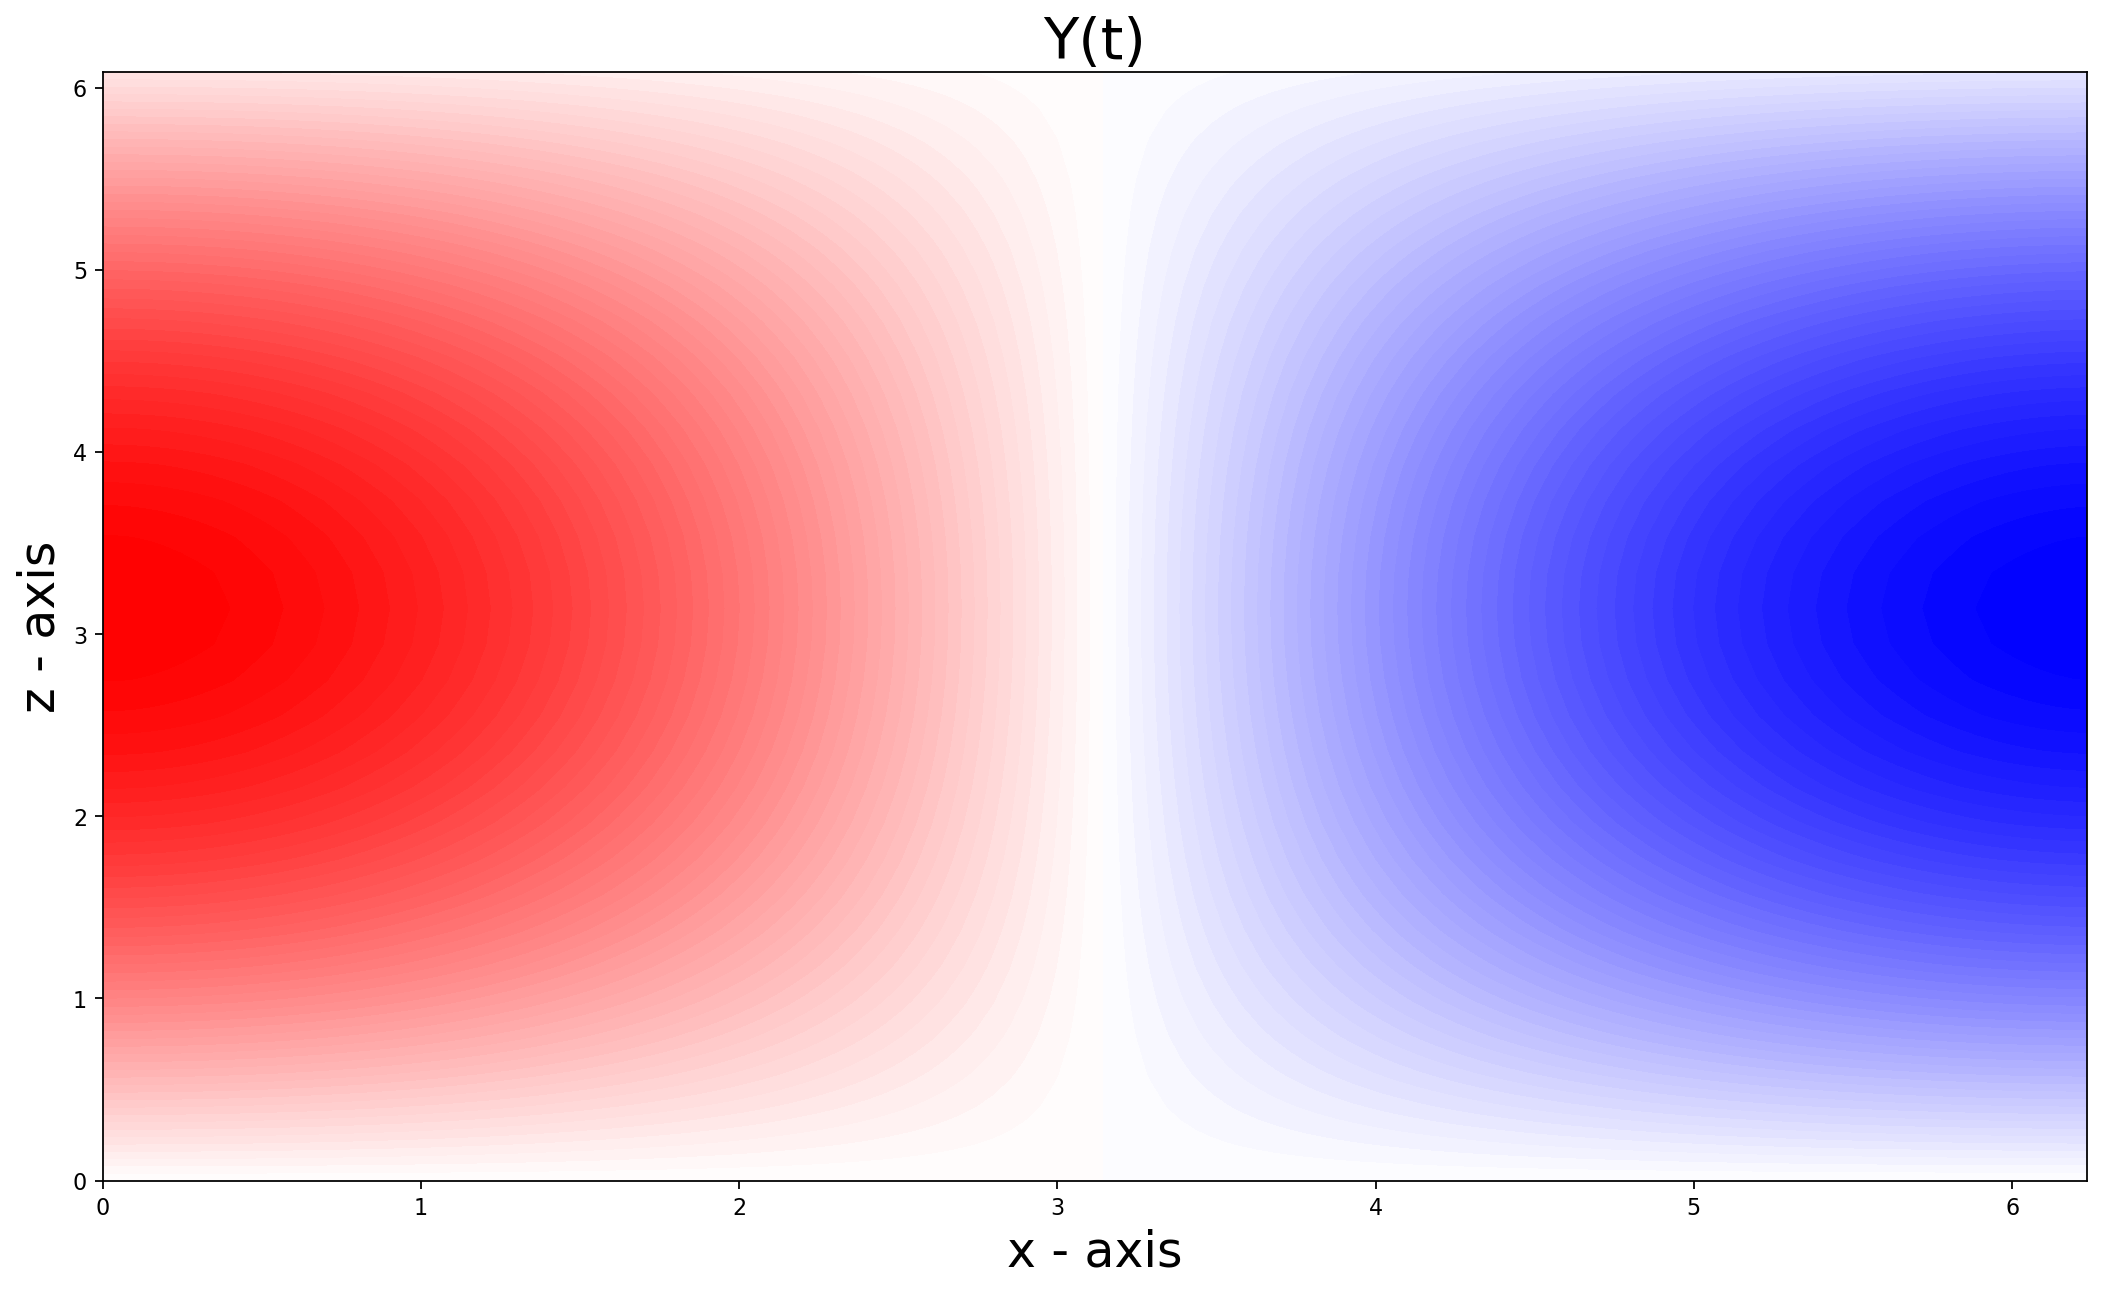

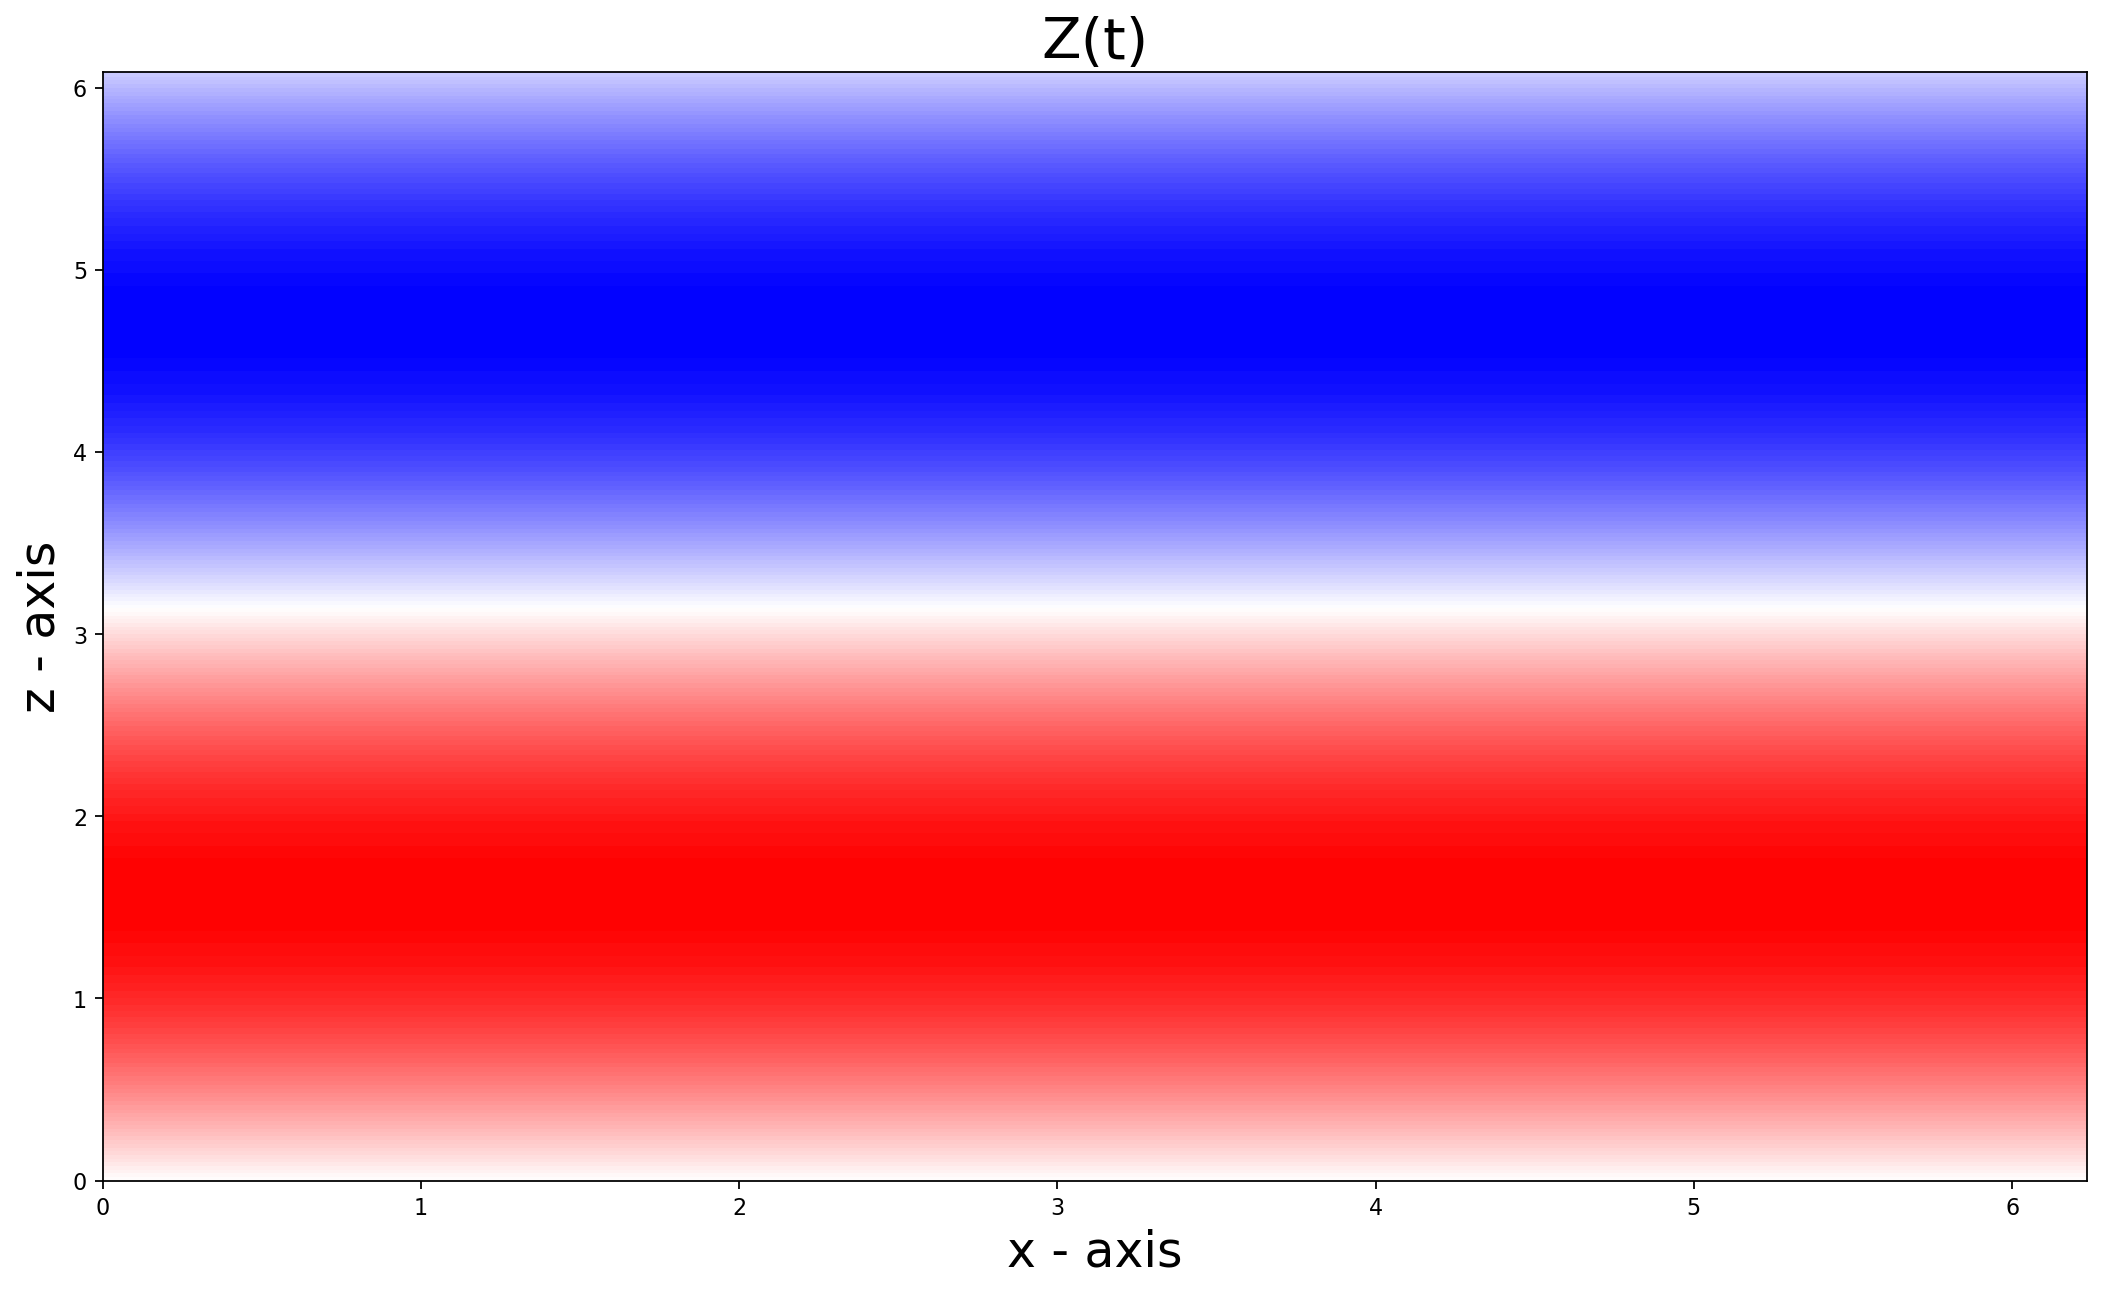

In [15]:
Nx, Nz = 128, 32
x = 2*np.pi*np.arange(Nx)/Nx
z = 2*np.pi*np.arange(Nz)/Nz
xx, zz = np.meshgrid(x, z)

plt.figure(figsize = (16, 9), 
           dpi = 160)
plt.contourf(xx, zz, np.sin(0.5* xx) * np.sin(0.5* zz), levels = 101, cmap = 'bwr')
plt.xlabel("x - axis", fontsize = 22)
plt.ylabel("z - axis", fontsize = 22)
plt.title("X(t)", fontsize = 26)

plt.figure(figsize = (16, 9), 
           dpi = 160)
plt.contourf(xx, zz, np.cos(0.5* xx) * np.sin(0.5* zz), levels = 101, cmap = 'bwr')
plt.xlabel("x - axis", fontsize = 22)
plt.ylabel("z - axis", fontsize = 22)
plt.title("Y(t)", fontsize = 26)

plt.figure(figsize = (16, 9), 
           dpi = 160)
plt.contourf(xx, zz, np.cos(0* xx) * np.sin(1* zz), levels = 101, cmap = 'bwr')
plt.xlabel("x - axis", fontsize = 22)
plt.ylabel("z - axis", fontsize = 22)
plt.title("Z(t)", fontsize = 26)
print()

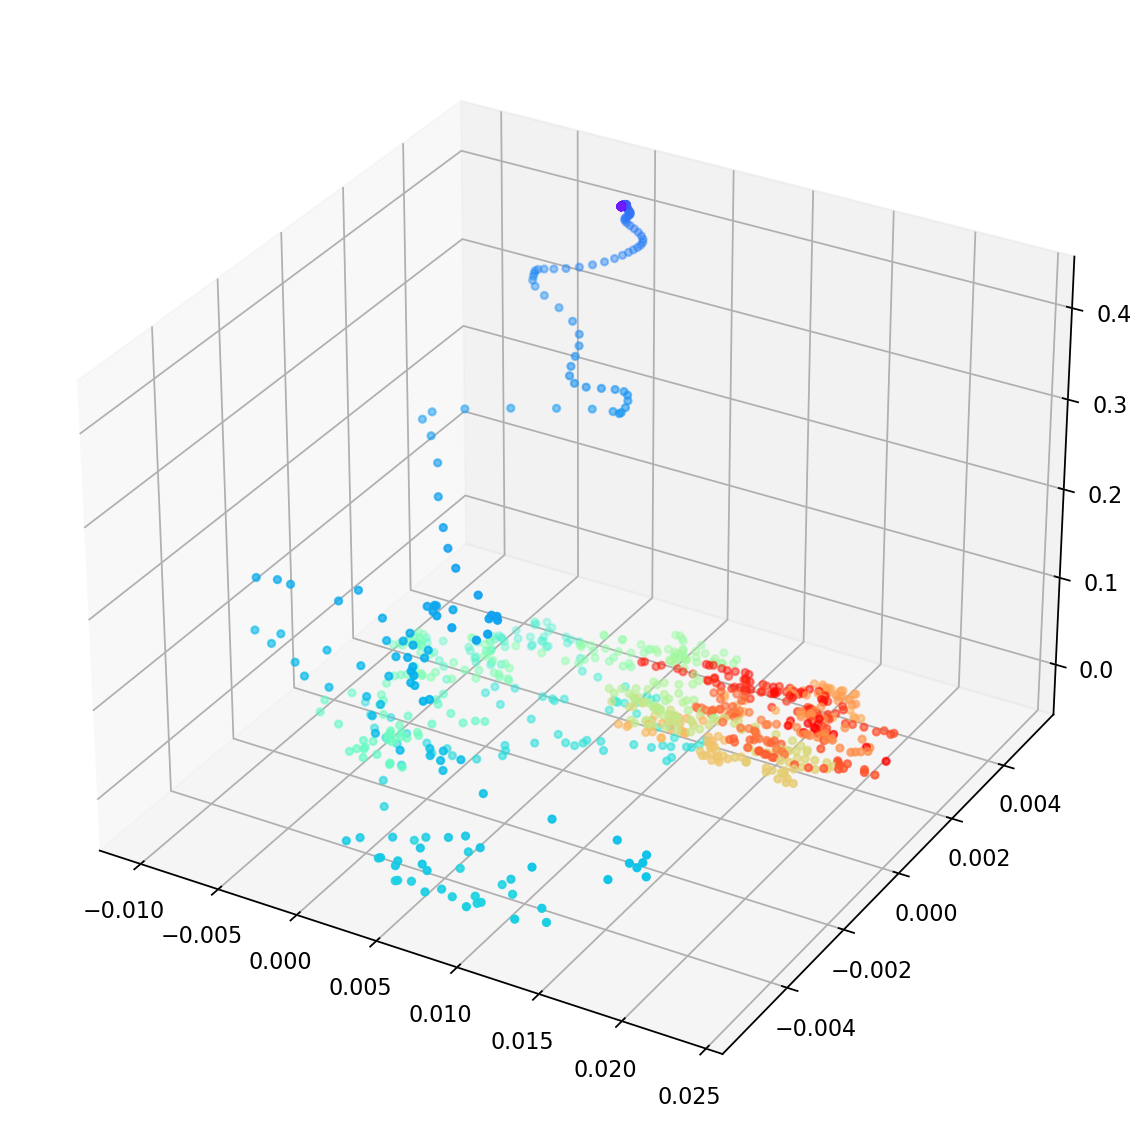

In [16]:
Na = len(b)


test = np.zeros(Na)
for i in range(Na):
    test[i] = np.sum(np.multiply(vor[i,:,:].T, np.sin(0.5* xx)*np.sin(0.5* zz)))/Nx/Nz
Xa = np.copy(test)

test = np.zeros(Na)
for i in range(Na):
    test[i] = np.sum(np.multiply(b[i,:,:].T, np.cos(0.5* xx)*np.sin(0.5* zz)))/Nx/Nz
Ya = np.copy(test)

test = np.zeros(Na)
for i in range(Na):
    test[i] = np.sum(np.multiply(b[i,:,:].T, np.cos(0.0* xx)*np.sin(1* zz)))/Nx/Nz
Za = np.copy(test)

fig = plt.figure(figsize = (16,9),
                 dpi = 160)
ax = fig.add_subplot(projection='3d')
# ax.plot(Xa, Ya, Za, 'k', linewidth = 1)

idx = 0
colors = cm.rainbow(np.linspace(0, 1, len(Xa[idx:])))
ax.scatter(Xa[idx:], Ya[idx:], Za[idx:], s=10, color = colors)

In [17]:
class GIFs:
    def __init__(self, x, y, z):
        self.fig, self.ax = plt.subplots(figsize=(16, 9), 
                                         dpi = 160,
                                         subplot_kw={'projection': '3d'})
        self.data = np.array([x,y,z])
        self.image = None
        return None
    def run(self):
        counter = 0
        def init():
            colors = cm.rainbow(np.linspace(0, 1, len(self.data[0,:])))
            self.ax.scatter(self.data[0,:], 
                            self.data[1,:], 
                            self.data[2,:], 
                            s=5, 
                            color = colors,
                            alpha = 1)
            self.image = self.ax.plot([], [], [], color = 'k', linewidth = 0.5)
            self.fig.suptitle("RB Convection", fontsize = 22)
            self.ax.set_xlim(self.data[0].min(), self.data[0].max())
            self.ax.set_ylim(self.data[1].min(), self.data[1].max())
            self.ax.set_zlim(self.data[2].min(), self.data[2].max())
            
            
            return None
        def update(time):
            self.image[-1].set_data(self.data[:2, :time])
            self.image[-1].set_3d_properties(self.data[2, :time].T)
            return None
        self.anim = animation.FuncAnimation(fig = self.fig, 
                                            func = update,
                                            frames = 1000,  
                                            interval = 20,
                                            init_func = init,
                                            blit = False)
        self.anim.save("HW2.mp4")
        return None

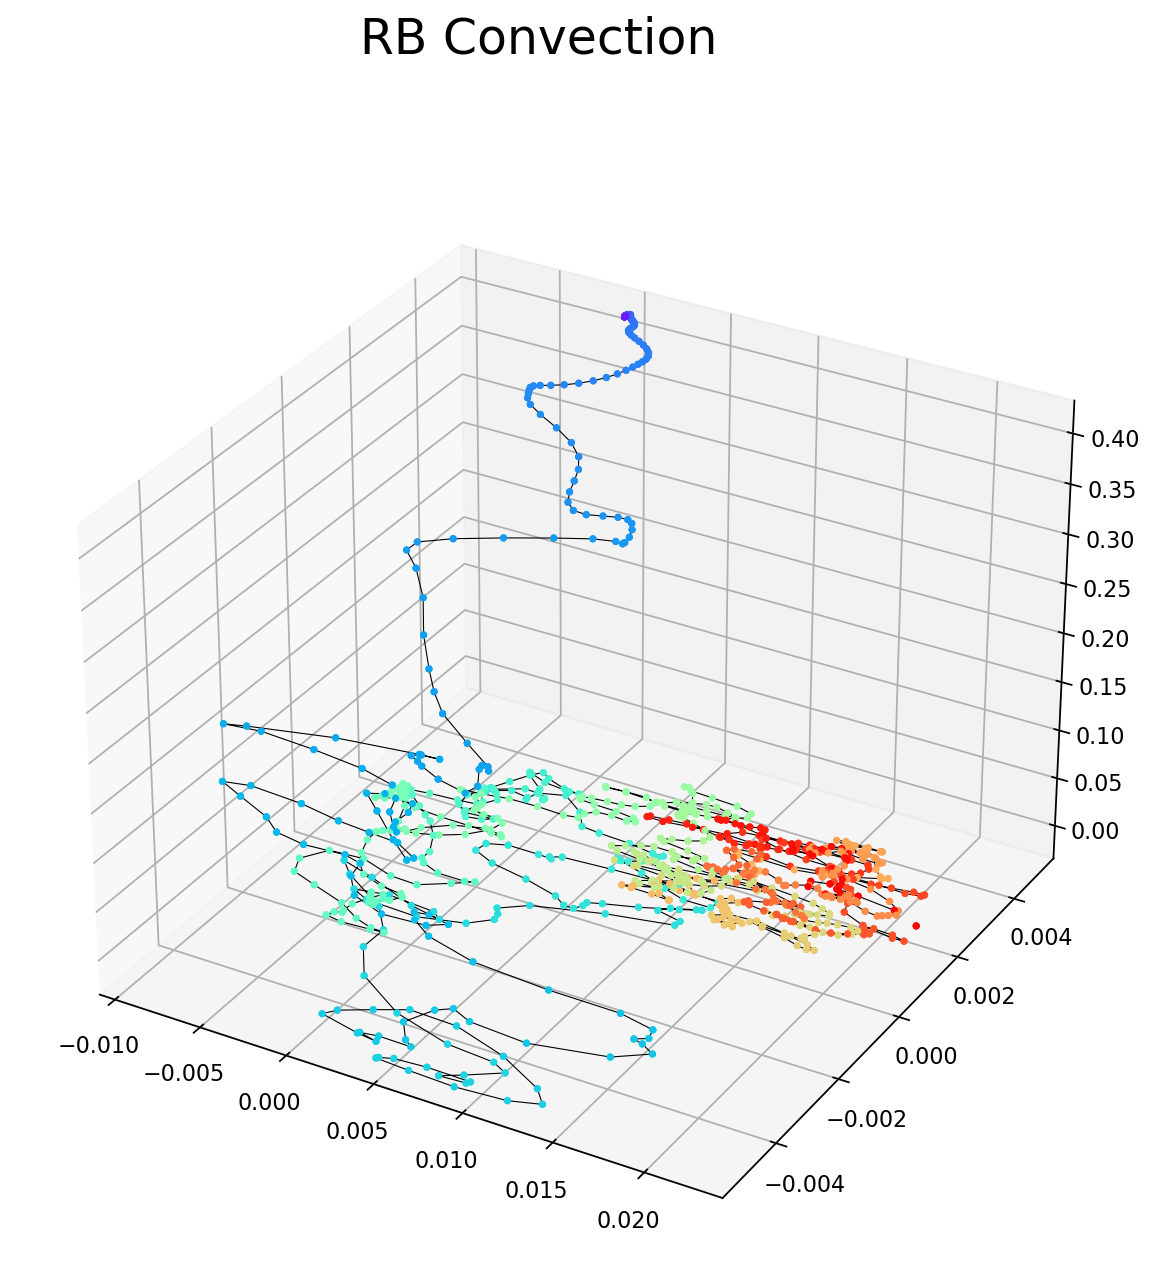

In [18]:
animator = GIFs(Xa[:], Ya[:], Za[:])
animator.run()